# Baseline

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [18]:
# Chargement du dataset nettoyé
df = pd.read_csv("data/clean_dataset.csv")

In [5]:
# Suppression des lignes avec des textes vides ou NaN
df = df.dropna(subset=['text_processed'])
df = df[df['text_processed'].str.strip().astype(bool)]

In [6]:
# Séparation des features et de la target
X = df['text_processed']
y = df['humor']

In [7]:
# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [8]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
from tqdm.notebook import tqdm
from sklearn.linear_model import SGDClassifier

tqdm.pandas()

model = SGDClassifier(loss="log_loss", max_iter=1, warm_start=True)

n_epochs = 20
for epoch in tqdm(range(n_epochs), desc="Entraînement du modèle"):
    model.fit(X_train, y_train)

Entraînement du modèle:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

In [10]:
# Prédictions
y_pred = model.predict(X_test)

 Rapport de classification :
              precision    recall  f1-score   support

       False       0.85      0.86      0.86     19999
        True       0.86      0.85      0.86     20000

    accuracy                           0.86     39999
   macro avg       0.86      0.86      0.86     39999
weighted avg       0.86      0.86      0.86     39999



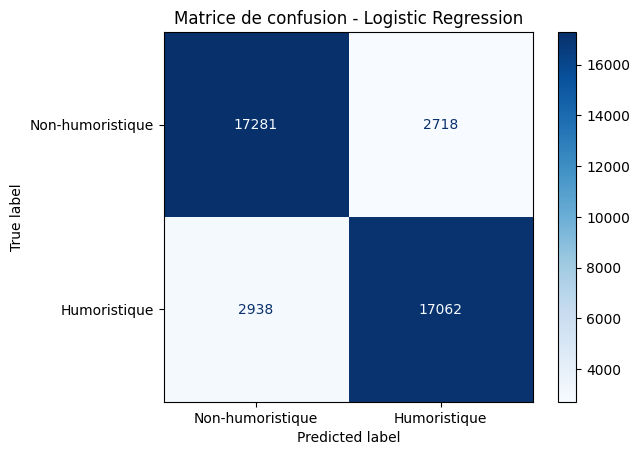

In [11]:
# Évaluation du modèle
print(" Rapport de classification :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-humoristique", "Humoristique"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion - Logistic Regression")
plt.show()

In [12]:
import joblib
from pathlib import Path

vectorizer_name = "tfidf5000"
f1_score = "86"

model_dir = Path(f"models/logistic_regression")
vectorizer_dir = Path(f"vectorizers/tfidf")
model_dir.mkdir(parents=True, exist_ok=True)
vectorizer_dir.mkdir(parents=True, exist_ok=True)

model_path = model_dir / f"logistic_regression_{vectorizer_name}_f1_{f1_score}_model.joblib"
vectorizer_path = vectorizer_dir / f"{vectorizer_name}_vectorizer.joblib"

joblib.dump(model, model_path)
joblib.dump(vectorizer, vectorizer_path)

print(f"Modèle sauvegardé dans : {model_path}")
print(f"Vectoriseur sauvegardé dans : {vectorizer_path}")

Modèle sauvegardé dans : models/logistic_regression/logistic_regression_tfidf5000_f1_86_model.joblib
Vectoriseur sauvegardé dans : vectorizers/tfidf/tfidf5000_vectorizer.joblib
